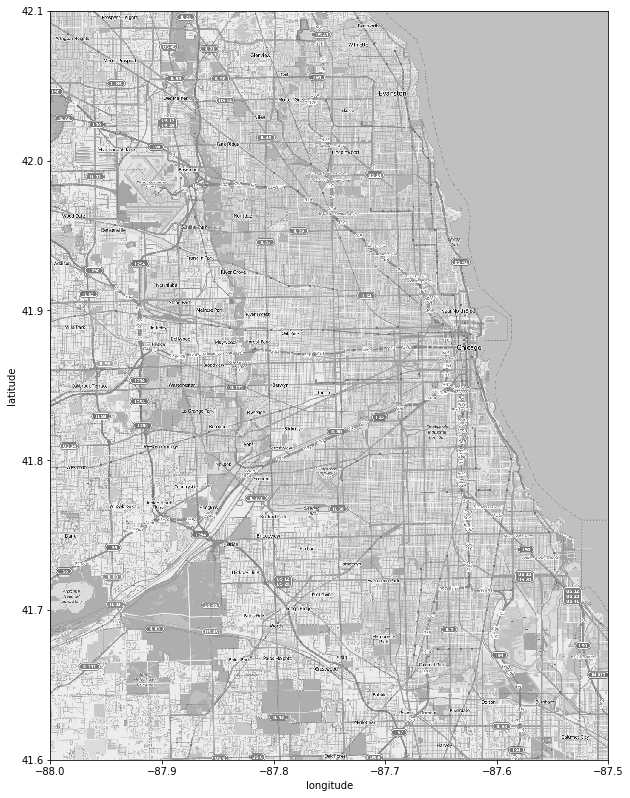

In [9]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv',
                 usecols=['Date', 'Species', 'Latitude', 'Longitude', 'NumMosquitos'],
                 sep=',')

species = set(df['Species'])

stats = dict() # date->species->location->flux
for i in range(len(df)):
    mos_type = df.loc[i]['Species']
    if mos_type in stats:
        if (df.loc[i]['Latitude'], df.loc[i]['Longitude']) in stats[mos_type]:
            stats[mos_type][(df.loc[i]['Latitude'], df.loc[i]['Longitude'])] += df.loc[i]['NumMosquitos']
        else:
            stats[mos_type][(df.loc[i]['Latitude'], df.loc[i]['Longitude'])] = 0
    else:
        stats[mos_type] = dict()
        
import matplotlib.pyplot as plt

mapdata = np.loadtxt("mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-88, -87.5, 41.6, 42.1)


for mos in stats.keys():
    plt.clf()
    plt.figure(figsize=(10, 14))
    plt.imshow(mapdata,
               cmap=plt.get_cmap('gray'),
               extent=lon_lat_box,
               aspect=aspect)
    plt.xlabel('longitude')
    plt.ylabel('latitude')

    lon = list()
    lat = list()
    flux = list()
    for ele in stats[mos].keys():
        lon.append(ele[1])
        lat.append(ele[0])
        flux.append(stats[mos][ele])
    plt.scatter(lon, lat, c=flux, cmap='plasma', linewidth=0, alpha=0.5)
    plt.savefig('./'+mos.replace('/', '_')+'.png')
    
    
